In [1]:
# Preamble
import sys
sys.path.append("/Users/rq.aita/Códigos/scripts")
sys.path.append("/home/ufpr/Documentos/GitHub/scripts")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import settings_plot

In [2]:
# Loading file serie_anual.txt
# serie_anual = pd.read_csv('files/serie_anual.txt', sep='\t', header=None)
serie_anual = pd.read_csv('files/sto_antonio_jari.txt', sep='\t', header=None)

# TO-DO
Calculate the descriptive statistics of the time series:
- mean
- standart deviation
- variance
- median
- mode
- range
- quartiles
- percentiles

Plot the following:
- Box-plot diagram
- Violin plot
- Scatterplot
- QQ plot

## Descriptive statistics

In [3]:
N    = serie_anual[1].count()  # size of the series
mean = round(serie_anual[1].mean(), 2)
std  = round(serie_anual[1].std(), 2)
var  = round(serie_anual[1].var(), 2)
q1   = round(serie_anual[1].quantile(q=0.25), 2)
q2   = round(serie_anual[1].quantile(q=0.5), 2)
q3   = round(serie_anual[1].quantile(q=0.75), 2)
AIQ  = round(q3 - q1, 2)
xmax = round(serie_anual[1].max(), 2)
xmin = round(serie_anual[1].min(), 2)
A    = round(xmax - xmin, 2)
cvar = round(100 * std / mean, 0)
skew = round(serie_anual[1].skew(), 3)
kurt = round(serie_anual[1].kurtosis(), 3)

In [4]:
desc_stats = {}

desc_stats['Tamanho']                 = [N   , '-']
desc_stats['Média']                   = [mean, 'm3/s']
desc_stats['Desvio padrão']           = [std , 'm3/s']
desc_stats['Variância']               = [var , 'm6/s2']
desc_stats['Primeiro quartil']        = [q1  , 'm3/s']
desc_stats['Mediana']                 = [q2  , 'm3/s']
desc_stats['Terceiro quartil']        = [q3  , 'm3/s']
desc_stats['Amplitude inter-quartil'] = [AIQ , 'm3/s']
desc_stats['Máximo']                  = [xmax, 'm3/s']
desc_stats['Mínimo']                  = [xmin, 'm3/s']
desc_stats['Amplitude']               = [A   , 'm3/s']
desc_stats['Coeficiente de variação'] = [cvar, '%']
desc_stats['Assimetria']              = [skew, '-']
desc_stats['Curtose']                 = [kurt, '-']

desc_stats = pd.DataFrame(desc_stats).transpose()
desc_stats.columns = ['Valor', 'Unidade']

In [5]:
desc_stats

,Valor,Unidade
Tamanho,89,-
Média,1092.17,m3/s
Desvio padrão,290.34,m3/s
Variância,84299.78,m6/s2
Primeiro quartil,906.0,m3/s
Mediana,1076.0,m3/s
Terceiro quartil,1219.0,m3/s
Amplitude inter-quartil,313.0,m3/s
Máximo,1910,m3/s
Mínimo,344,m3/s


In [6]:
desc_stats.to_csv('report/stats.txt', sep=',')

## Plots

### Time series

[]

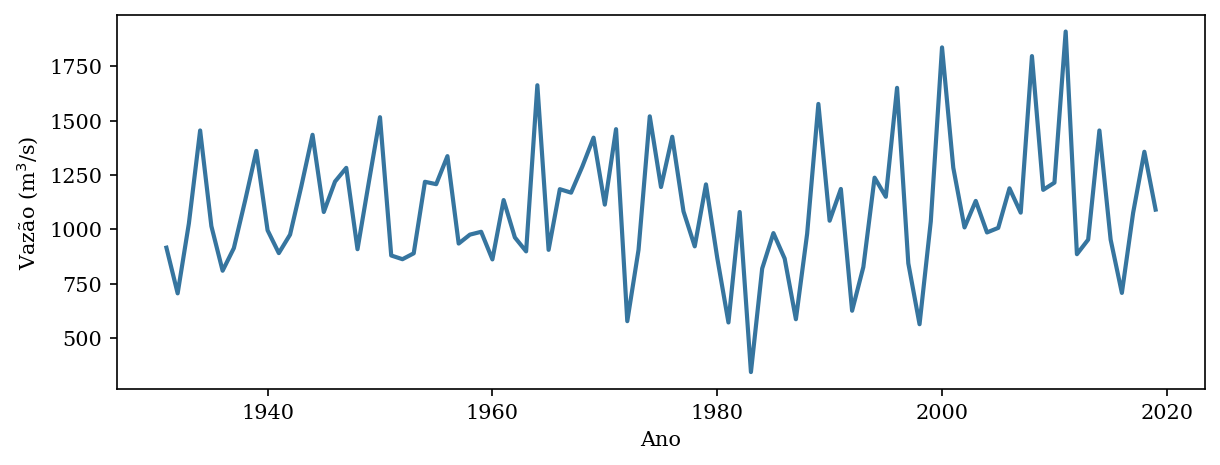

In [7]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 3))
ax.plot(serie_anual[0], serie_anual[1], color='#36759f', lw=2, zorder=5)
ax.set_xlabel('Ano')
ax.set_ylabel('Vazão (m$^3$/s)')

fig.savefig('report/time_series.png', format='png', dpi=300)
plt.plot()

### Box-plot and violin plot diagram

[]

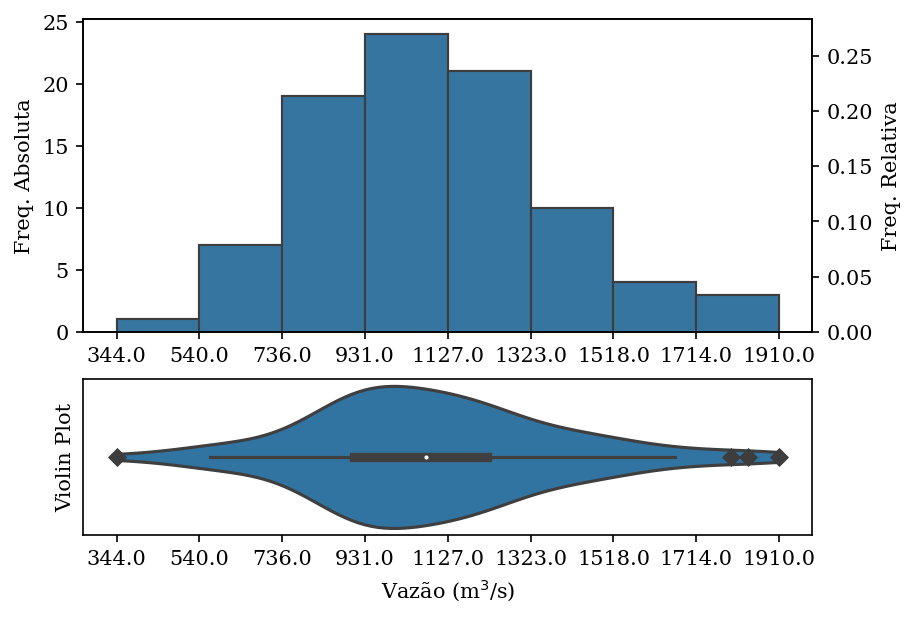

In [8]:
q1, q3 = np.percentile(serie_anual[1], [25, 75])
whisker_low = q1 - (q3 - q1) * 1.5
whisker_high = q3 + (q3 - q1) * 1.5
outliers = serie_anual[1][(serie_anual[1] > whisker_high) | (serie_anual[1] < whisker_low)]

fig, ax = plt.subplots(2, 1, constrained_layout=True, gridspec_kw={"height_ratios":[2, 1]})
ax_right = ax[0].twinx()

n, bins, _ = ax[0].hist(
        x=serie_anual[1], bins='sturges', color='#36759f', edgecolor='#3d3d3d',
)
ax[0].set_ylabel("Freq. Absoluta")
ax[0].set_xticks(bins)
ax[0].set_xticklabels(bins.round())
ax_right.hist(
        x=serie_anual[1], bins=len(n), color='#36759f', edgecolor='#3d3d3d', 
        weights=np.ones_like(serie_anual[1].to_numpy())/len(serie_anual[1]),
)
ax_right.set_ylabel("Freq. Relativa")

sns.violinplot(x=serie_anual[1], cut=0, ax=ax[1])
ax[1].set_xticks(bins)
ax[1].set_xticklabels(bins.round())
ax[1].set_yticks([])
ax[1].set_xlabel('Vazão (m$^3$/s)')
ax[1].set_ylabel("Violin Plot")
sns.scatterplot(x=outliers, y=0, marker='D', edgecolor='#3d3d3d', color='#3d3d3d', ax=ax[1])

fig.savefig('report/plots.png', format='png', dpi=300)
plt.plot()

### 

## Automated report

In [9]:
from fpdf import FPDF
import csv

In [10]:
class PDF(FPDF):
    # Page header
    def header(self):
        # Title
        self.set_font('Arial', 'B', 15)
        self.cell(85, 7, 'Relatório de Análise Preliminar', border='B', align='L')
        # Nome da série
        self.set_font('Arial', '', 12)
        self.cell(85, 7, nome_serie, border='B', align='R')
        # Line break
        self.ln(20)

    # Page footer
    def footer(self):
        # Position at 2 cm from bottom
        self.set_y(-20)
        # Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Page number
        self.cell(0, 10, 'Criado por Raquel A. Aita (raquel.aita@ufpr.br)', 0, 0, 'L')
        self.cell(0, 10, str(self.page_no()) + '/{nb}', 0, 0, 'R')

    # Tabela
    def improved_table(self, headings, rows, col_widths=(70, 50, 50)):
        for col_width, heading in zip(col_widths, headings):
            self.cell(col_width, 7, heading, border=1, align="C")
        self.ln()
        for row in rows:
            self.cell(col_widths[0], 6, row[0], border="LR", align="L")
            self.cell(col_widths[1], 6, row[1], border="LR", align="C")
            self.cell(col_widths[2], 6, row[2], border="LR", align="C")
            self.ln()
        # Closure line:
        self.cell(sum(col_widths), 0, "", border="T")
        self.ln(8)

def load_data_from_csv(csv_filepath):
    headings, rows = [], []
    with open(csv_filepath, encoding="utf8") as csv_file:
        for row in csv.reader(csv_file, delimiter=","):
            if not headings:  # extracting column names from first row:
                headings = row
            else:
                rows.append(row)
    return headings, rows       

In [11]:
col_names, data = load_data_from_csv('report/stats.txt')
# nome_serie = 'Sobradinho'
nome_serie = 'UHE Santo Antônio do Jari'

pdf = PDF()
pdf.set_margins(20, 20, 20)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_font('Arial', '', 10)

# Série temporal
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Série temporal')
pdf.ln()
pdf.image('report/time_series.png', w=170)
pdf.ln()

# Estatísticas descritivas
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Estatísticas descritivas')
pdf.ln()
pdf.set_font('Arial', '', 10)
pdf.improved_table(col_names, data)

pdf.add_page()

# Gráficos
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Representações gráficas')
pdf.ln()
pdf.image('report/plots.png', w=170)
    
pdf.output('report/pre_analysis.pdf', 'F')

''